# Clustering

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('output_classifiers.csv')
df.drop(['yummy'], axis='columns', inplace=True)

# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_oceon       121 non-null    float64
 8   salmon           121 non-null    float64
 9   mackerel         121 non-null    float64
 10  can              121 non-null    float64
 11  gravy            121 non-null    float64
 12  vegan            121 non-null    float64
 13  company_farmina  121 non-null    float64
 14  company_me-o     121 non-null    float64
 15  company_meat     121 non-null    float64
 16  company_purepet  121 non-null    float64
 17  company_purina  

## Hierarchical Clustering

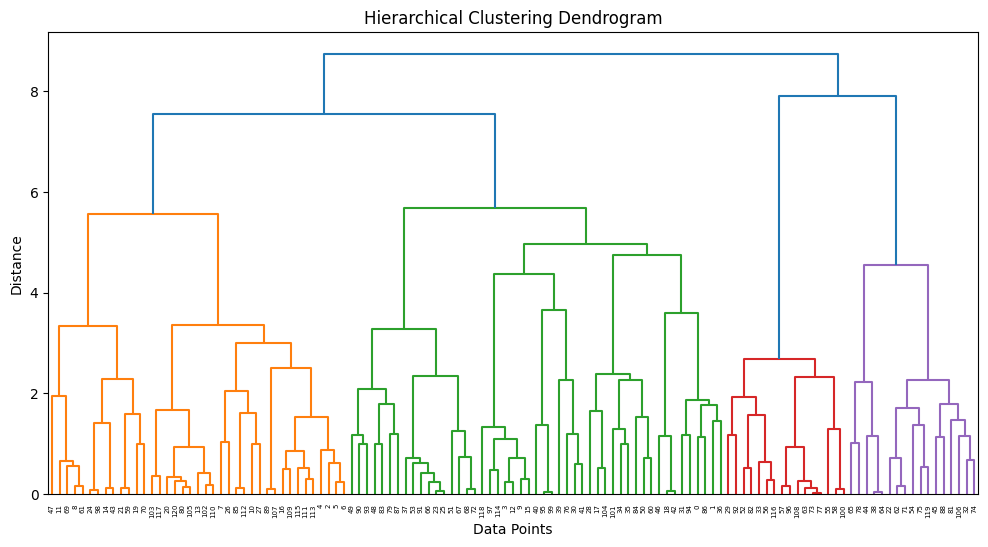

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Assuming you have a DataFrame 'df' with your data

# Calculate the linkage matrix using hierarchical clustering
linkage_matrix = hierarchy.linkage(df, method='ward')  # You can choose a different method if needed

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## K-Means

C:\Users\kater\.conda\envs\test\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


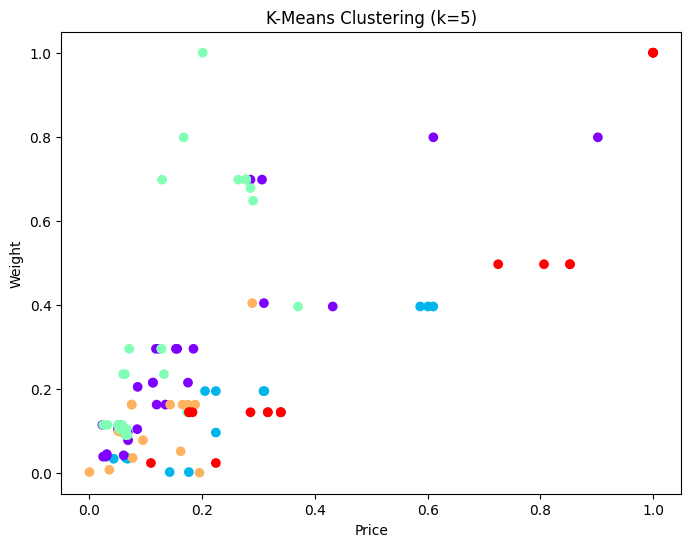

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with your data

# Specify the number of clusters (k)
k = 5  # You can choose a different value for k

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(df)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
df['Cluster_kmeans'] = cluster_labels

# Visualize the clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(df.price, df.weight, c=cluster_labels, cmap='rainbow')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

In [7]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your data and a 'Cluster' column

# Group the data by the 'Cluster' column and calculate the mean for each cluster
cluster_centroids = df.groupby('Cluster_kmeans').mean().round(3)

# Display the centroids
cluster_centroids

,price,weight,star_rating,total_comments,adult,chicken,wet,from_oceon,salmon,mackerel,...,gravy,vegan,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
Cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.155,0.236,0.753,0.137,0.864,0.182,0.833,0.939,0.091,0.394,...,0.152,0.030,0.000,0.0,0.000,0.061,0.000,0.000,0.000,0.939
1,0.225,0.136,0.668,0.066,0.412,0.235,0.412,0.235,0.000,0.000,...,0.176,0.000,0.000,0.0,0.000,0.000,0.294,0.706,0.000,0.000
2,0.131,0.323,0.646,0.067,0.838,0.059,0.618,0.765,0.176,0.088,...,0.000,0.000,0.029,0.5,0.206,0.118,0.088,0.000,0.059,0.000
3,0.111,0.115,0.618,0.051,0.711,0.947,0.368,0.579,0.158,0.000,...,0.737,0.158,0.000,0.0,0.053,0.158,0.053,0.000,0.368,0.368
4,0.502,0.352,0.744,0.017,0.889,0.333,0.833,0.111,0.111,0.000,...,0.000,0.722,1.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000


In [5]:
df['Cluster_kmeans'].value_counts()

2    34
0    33
3    19
4    18
1    17
Name: Cluster_kmeans, dtype: int64

## DBSCAN

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Assuming you have a DataFrame 'df' with your data

# Initialize the DBSCAN model
eps = 5  # Epsilon: radius of the neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to your data
clusters = dbscan.fit_predict(df_scaled)

# Add the cluster labels to your DataFrame
df['Cluster_dbscan'] = clusters

# Print the number of clusters and noise points (-1 represents noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

NameError: name 'df_scaled' is not defined

In [ ]:
df['Cluster_dbscan'].value_counts()